In [17]:
import pandas as pd 
from pycaret.regression import *

# Problem Statement
The performance of concrete is universally determined by its unaxial compressive strength, which is also closely related to other physcial properties of the concrete batch. According to the General Specifications of CEDD. It is required to conduct 1-2 concrete strength test per 100m^3 batch. However, conventional Cube Crushing Test takes too much time, usually up to 28 days or more. Therefore, it may be desirable to obtain a relationship between concrete constituent materials to find its compressive strength. 

In [18]:
df = pd.read_csv('concrete_data.csv')

In [19]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


In [21]:
reg101 = setup(data=df, target='concrete_compressive_strength', session_id=1)

,Description,Value
0,Session id,1
1,Target,concrete_compressive_strength
2,Target type,Regression
3,Original data shape,"(1030, 9)"
4,Transformed data shape,"(1030, 9)"
5,Transformed train set shape,"(721, 9)"
6,Transformed test set shape,"(309, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


In [22]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3089,23.4762,4.7809,0.9155,0.1535,0.1154,0.3920
gbr,Gradient Boosting Regressor,3.7882,26.6305,5.1133,0.9042,0.1668,0.1331,0.0190
et,Extra Trees Regressor,3.2392,26.3927,5.0508,0.9031,0.1589,0.1143,0.0240
rf,Random Forest Regressor,3.6900,28.2274,5.2428,0.8981,0.1699,0.1323,0.0420
dt,Decision Tree Regressor,4.7607,57.3413,7.4049,0.7951,0.2363,0.1655,0.0090
ada,AdaBoost Regressor,6.1616,57.0373,7.5318,0.7943,0.2780,0.2605,0.0130
knn,K Neighbors Regressor,7.1524,87.5431,9.2998,0.6872,0.3137,0.2801,0.0050
ridge,Ridge Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0040
lar,Least Angle Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0030
lr,Linear Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.3120


LGBMRegressor(n_jobs=-1, random_state=1)

In [23]:
lightgbm = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0441,29.0127,5.3863,0.8775,0.1951,0.1411
1,2.7727,14.4268,3.7983,0.9502,0.1756,0.1289
2,2.9997,16.5722,4.0709,0.9502,0.1285,0.1003
3,3.2368,19.3184,4.3953,0.9280,0.1408,0.1087
4,3.6838,33.2648,5.7676,0.8836,0.1487,0.1045
5,3.0715,17.3470,4.1650,0.9398,0.1366,0.0976
6,3.3388,20.5982,4.5385,0.9024,0.1432,0.1104
7,3.1557,17.8249,4.2220,0.9404,0.1527,0.1202
8,4.1940,39.8427,6.3121,0.8825,0.1704,0.1303


In [24]:
lightgbm_tuned = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2.9052,26.0808,5.1069,0.8899,0.1841,0.1318
1,2.5968,12.4569,3.5294,0.9570,0.1525,0.1122
2,2.8443,15.1530,3.8927,0.9545,0.1375,0.1029
3,2.8704,14.5435,3.8136,0.9458,0.1271,0.1012
4,3.9380,36.9832,6.0814,0.8706,0.1603,0.1139
5,3.1254,19.5067,4.4166,0.9322,0.1493,0.1043
6,3.0399,21.0461,4.5876,0.9003,0.1442,0.1010
7,2.1846,8.8545,2.9757,0.9704,0.1222,0.0880
8,4.0507,39.7451,6.3044,0.8828,0.1732,0.1326


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [25]:
print(lightgbm_tuned)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=3, feature_fraction=0.5,
              learning_rate=0.3, min_child_samples=26, min_split_gain=0.8,
              n_estimators=230, n_jobs=-1, num_leaves=100, random_state=1,
              reg_alpha=0.005, reg_lambda=4)


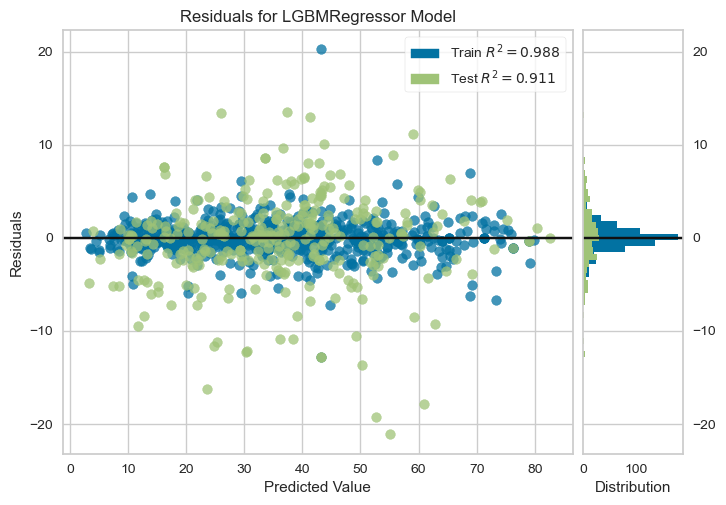

In [26]:
plot_model(lightgbm_tuned)

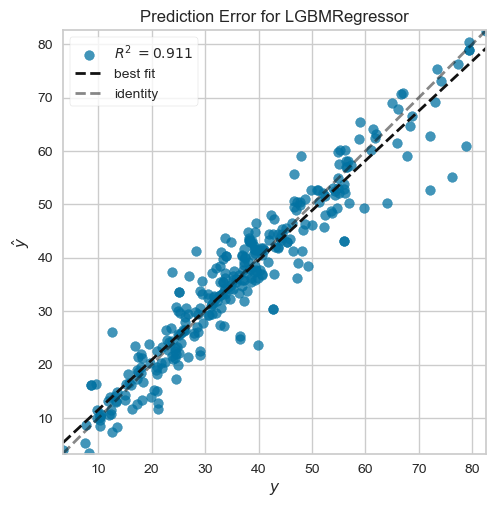

In [27]:
plot_model(lightgbm_tuned, plot='error')

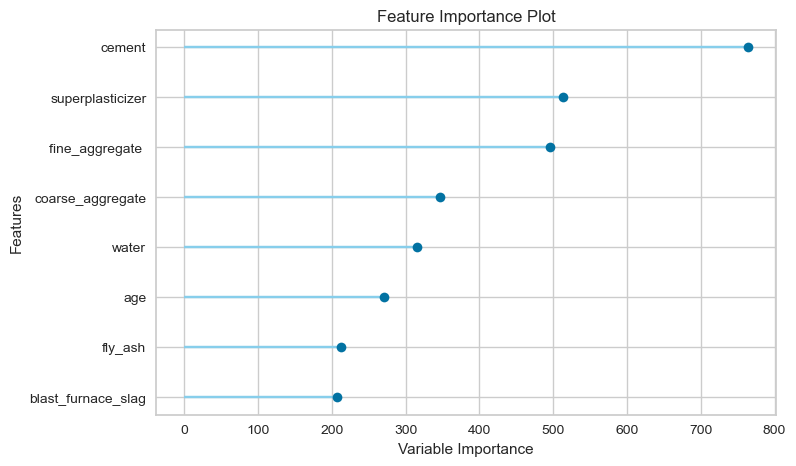

In [28]:
plot_model(lightgbm_tuned, plot='feature')

In [29]:
predict_model(lightgbm)
# predict_model(lightgbm_tuned)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.2899,23.2918,4.8262,0.9111,0.1505,0.1076


,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength,prediction_label
339,297.200012,0.000000,117.500000,174.800003,9.5,1022.799988,753.500000,3,21.910000,19.164950
244,238.100006,0.000000,94.099998,186.699997,7.0,949.900024,847.000000,3,19.930000,11.623227
882,140.000000,133.000000,103.000000,200.000000,7.0,916.000000,753.000000,28,36.439999,20.623996
567,203.500000,135.699997,0.000000,185.699997,0.0,1076.199951,759.299988,7,11.960000,11.080451
923,162.000000,207.000000,172.000000,216.000000,10.0,822.000000,638.000000,28,39.840000,31.221933
...,...,...,...,...,...,...,...,...,...,...
1018,321.399994,0.000000,127.900002,182.500000,11.5,870.099976,779.700012,28,37.270000,39.242313
1015,322.500000,148.600006,0.000000,185.800003,8.5,951.000000,709.500000,28,52.430000,49.276198
341,297.200012,0.000000,117.500000,174.800003,9.5,1022.799988,753.500000,28,47.400002,39.897559
750,500.000000,0.000000,0.000000,200.000000,0.0,1125.000000,613.000000,28,44.090000,44.007172


Ensemble Models 

In [32]:
best_rmse_models_top3 = compare_models(sort = 'RMSE', n_select = 3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.3089,23.4762,4.7809,0.9155,0.1535,0.1154,0.4580
et,Extra Trees Regressor,3.2392,26.3927,5.0508,0.9031,0.1589,0.1143,0.0250
gbr,Gradient Boosting Regressor,3.7882,26.6305,5.1133,0.9042,0.1668,0.1331,0.0190
rf,Random Forest Regressor,3.6900,28.2274,5.2428,0.8981,0.1699,0.1323,0.0430
dt,Decision Tree Regressor,4.7607,57.3413,7.4049,0.7951,0.2363,0.1655,0.0040
ada,AdaBoost Regressor,6.1616,57.0373,7.5318,0.7943,0.2780,0.2605,0.0140
knn,K Neighbors Regressor,7.1524,87.5431,9.2998,0.6872,0.3137,0.2801,0.0050
lar,Least Angle Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0040
ridge,Ridge Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0030
lr,Linear Regression,8.0752,105.1372,10.1987,0.6209,0.3297,0.3137,0.0160


In [35]:
best_rmse_models_top3

[LGBMRegressor(n_jobs=-1, random_state=1),
 ExtraTreesRegressor(n_jobs=-1, random_state=1),
 GradientBoostingRegressor(random_state=1)]

In [37]:
blend_models(best_rmse_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.0087,29.1496,5.3990,0.8770,0.2017,0.1450
1,2.6940,13.9813,3.7392,0.9517,0.1684,0.1222
2,2.8140,15.0272,3.8765,0.9548,0.1214,0.0957
3,3.0861,14.6178,3.8233,0.9455,0.1255,0.1065
4,3.5945,30.4387,5.5171,0.8935,0.1292,0.0970
5,2.9391,15.0270,3.8765,0.9478,0.1164,0.0907
6,3.3275,23.3359,4.8307,0.8894,0.1481,0.1114
7,3.2413,19.8045,4.4502,0.9338,0.1593,0.1268
8,4.1016,38.5864,6.2118,0.8862,0.1674,0.1268


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=1)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=1)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=1))],
                n_jobs=-1)